<a href="https://colab.research.google.com/github/mrizazul/PCVK_GENAP_2021/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


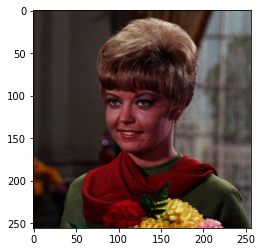

In [19]:
import cv2 as cv 
from google.colab.patches import cv2_imshow 
from skimage import io 
import matplotlib.pyplot as plt 
import numpy as np 

img = cv.imread('/content/drive/MyDrive/Assets/female.tiff')
image = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(image)

 Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 50


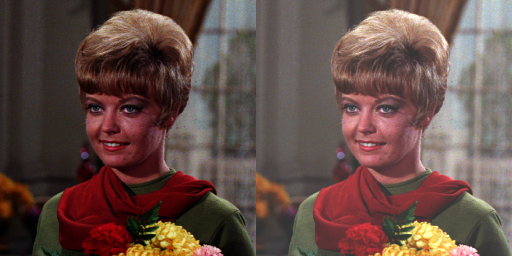

In [10]:
print(' Mengubah tingkat kecerahan citra')
print('---------------------------------')

try:
    brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/Assets/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

 Mengubah kontras dan tingkat kecerahan citra
---------------------------------
Masukkan tingkat kecerahan[-255 - 255]: 60
Masukkan kontras [1.0-3.0]: 1.5


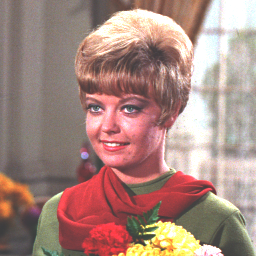

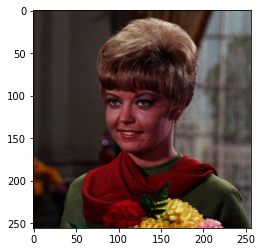

In [24]:
new_image = np.zeros(image.shape, image.dtype)

print(' Mengubah kontras dan tingkat kecerahan citra')
print('---------------------------------')

try:
    brightness = int(input('Masukkan tingkat kecerahan[-255 - 255]: '))
    contrast = float(input('Masukkan kontras [1.0-3.0]: '))
except ValueError:
    print('Error, not a number')


for y in range(image.shape[0]):
    for x in range(image.shape[1]):
        for c in range(image.shape[2]):
            new_image[y,x,c] = np.clip(contrast*image[y,x,c] + brightness, 0, 255)
plt.imshow(image)
cv2_imshow(cv.cvtColor(new_image,cv.COLOR_BGR2RGB))

 -------------------------------- 
Masukan nilai kecerahan: 40


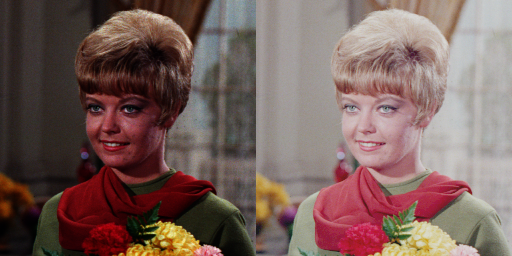

In [25]:
print(' -------------------------------- ')

try:
    brightness = int(input('Masukan nilai kecerahan: '))
except ValueError:
    print('Error, not a number')

original = image
brightness_image = np.zeros(original.shape, original.dtype)

for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        for c in range(original.shape[2]):
            brightness_image[y,x,c] = np.clip(brightness*(np.log(1.0+original[y,x,c])), 0, 255)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(cv.cvtColor(final_frame,cv.COLOR_BGR2RGB))

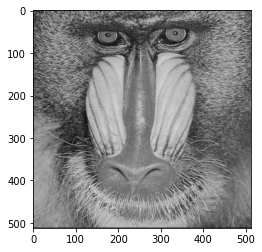

In [53]:
imgavg = cv.imread('/content/drive/MyDrive/Assets/mandrill.tiff')

imgavg[:] = imgavg.mean(axis=-1, keepdims=1) 

plt.imshow(imgavg)

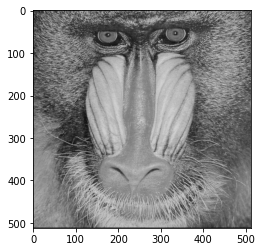

In [27]:
imglight = cv.imread('/content/drive/MyDrive/Assets/mandrill.tiff')
imglight[:] = np.max(imglight,axis=-1,keepdims=1)/2+np.min(imglight,axis=-1,keepdims=1)/2
plt.imshow(imglight)

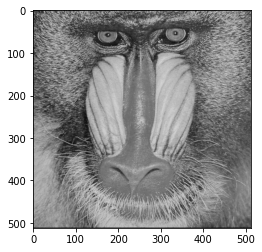

In [28]:
lumin = cv.imread('/content/drive/MyDrive/Assets/mandrill.tiff')
W = [0.2,0.5,0.3] # weights
W_mean = np.tensordot(lumin,W, axes=((-1,-1)))[...,None]
lumin[:] = W_mean.astype(lumin.dtype)
plt.imshow(lumin)

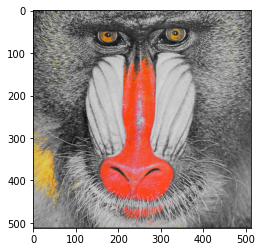

In [51]:
r = cv.imread('/content/drive/MyDrive/Assets/mandrill.tiff')
finimg = cv.cvtColor(r, cv.COLOR_BGR2RGB)
ret, mask = cv.threshold(r[:, :,2], 200, 255, cv.THRESH_BINARY)

mask3 = np.zeros_like(r)
mask3[:, :, 0] = mask
mask3[:, :, 1] = mask
mask3[:, :, 2] = mask

red = cv.bitwise_and(finimg, mask3)
gray = cv.cvtColor(finimg, cv.COLOR_BGR2GRAY)
finimg  = cv.cvtColor(gray, cv.COLOR_GRAY2BGR)

gray = cv.bitwise_and(finimg, 255 - mask3)

ed = gray + red
plt.imshow(ed)